# Mid-air Loss of Separation Detection Module (MLSDM)

Author: Yanyu Wang, Carnegie Mellon University

Email: yanyuwan@andrew.cmu.edu

This module predicts the loss of separation to support air traffic controllers to detect loss of separtion.

Loss of separation is a situation where aircraft fail to maintain minimum distances in controlled airspace.

More information about CatBoost can be found [here](https://doi.org/10.1109/WSC48552.2020.9384047)

## Importing library

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import repeat
plt.rcParams['figure.figsize'] = (1,10)

## Model Training

In [2]:
class train_los_model(object):
    def __init__(self):
        self.n = 1455 # Specific time duration request
    def model_based_on_N(self,x,y,visualization=True):
        assert int(list(x.columns)[0]) == 0, "Wrong input file"
        # x = pd.read_csv('l_1_x_2_n.csv')
        # y = pd.read_csv('l_1_y_2.csv')
        df_result = pd.DataFrame(columns=['i','j','Accuracy_Rate','F1_Score'])
        x_values=x.values
        y_values = y.values.ravel()
        n = self.n
        i_list = []
        j_list = []
        acc_list = []
        f1_list = []
        for i in range(0,11):
            for j in range(0,11):
                if i < j:
                    x_train = x_values[:n, i:j]
                    y_train = y_values[:n]

                    x_test = x_values[n:, i:j]
                    y_test = y_values[n:]

                    logisticRegr = LogisticRegression()
                    logisticRegr.fit(x_train, y_train)
                    logisticRegr.predict(x_test[0:])
                    predictions = logisticRegr.predict(x_test)
                    score = logisticRegr.score(x_test, y_test)
                    score = "%.5f" % score
                    cm = metrics.confusion_matrix(y_test, predictions)
                    F1_score_value = f1_score(y_test, predictions, average='binary')
                    F1_score_value = "%.5f" % F1_score_value

                    i_list.append(int(i)+1)
                    j_list.append(int(j))
                    acc_list.append(float(score))
                    f1_list.append(float(F1_score_value))

        df_result.loc[:, 'i'] = i_list
        df_result.loc[:, 'j'] = j_list
        df_result.loc[:, 'Accuracy_Rate'] = acc_list
        df_result.loc[:, 'F1_Score'] = f1_list


        if visualization ==True:
            # visualization
            data = df_result
            result = data.pivot_table(index='i', columns='j', values='F1_Score')
            sns.set(font_scale=2)
            sns.heatmap(result, annot=True, fmt=".5f", cmap='RdBu_r', annot_kws={"size": 15})
            plt.xlabel("End Timestamp", size=15)
            plt.ylabel("Start Timestamp", size=15)
            plt.show()
            data = df_result
            result = data.pivot_table(index='i', columns='j', values='Accuracy_Rate')
            sns.set(font_scale=2)
            sns.heatmap(result, annot=True, fmt=".5f", cmap='RdBu_r', annot_kws={"size": 15})
            plt.xlabel("End Timestamp", size=15)
            plt.ylabel("Start Timestamp", size=15)
            plt.show()
        return df_result
    def model_based_on_TN(self,x,y,visualization=True):
        assert int(list(x.columns)[0]) == 10,"Wrong input file"
        # x = pd.read_csv('l_1_x_2_tn.csv')
        # y = pd.read_csv('l_1_y_2.csv')
        df_result = pd.DataFrame(columns=['i','j','Accuracy_Rate','F1_Score'])
        x_values=x.values
        y_values = y.values.ravel()
        n = self.n
        i_list = []
        j_list = []
        acc_list = []
        f1_list = []
        for i in range(0,11):
            for j in range(0,11):
                if i < j:
                    x_train = x_values[:n, i:j]
                    y_train = y_values[:n]

                    x_test = x_values[n:, i:j]
                    y_test = y_values[n:]

                    logisticRegr = LogisticRegression()
                    logisticRegr.fit(x_train, y_train)
                    logisticRegr.predict(x_test[0:])
                    predictions = logisticRegr.predict(x_test)
                    score = logisticRegr.score(x_test, y_test)
                    score = "%.5f" % score
                    cm = metrics.confusion_matrix(y_test, predictions)
                    F1_score_value = f1_score(y_test, predictions, average='binary')
                    F1_score_value = "%.5f" % F1_score_value

                    i_list.append(int(i)+1)
                    j_list.append(int(j))
                    acc_list.append(float(score))
                    f1_list.append(float(F1_score_value))

        df_result.loc[:, 'i'] = i_list
        df_result.loc[:, 'j'] = j_list
        df_result.loc[:, 'Accuracy_Rate'] = acc_list
        df_result.loc[:, 'F1_Score'] = f1_list


        if visualization ==True:
            # visualization
            data = df_result
            result = data.pivot_table(index='i', columns='j', values='F1_Score')
            sns.set(font_scale=2)
            sns.heatmap(result, annot=True, fmt=".5f", cmap='RdBu_r', annot_kws={"size": 15})
            plt.xlabel("End Timestamp", size=15)
            plt.ylabel("Start Timestamp", size=15)
            plt.show()
            data = df_result
            result = data.pivot_table(index='i', columns='j', values='Accuracy_Rate')
            sns.set(font_scale=2)
            sns.heatmap(result, annot=True, fmt=".5f", cmap='RdBu_r', annot_kws={"size": 15})
            plt.xlabel("End Timestamp", size=15)
            plt.ylabel("Start Timestamp", size=15)
            plt.show()
        return df_result
    def model_based_on_N_and_TN(self,n_data,tn_data,y,visualization=True):
        # n_data = pd.read_csv('l_1_x_2_n.csv').values
        # tn_data = pd.read_csv('l_1_x_2_tn.csv').values
        # y = pd.read_csv('l_1_y_2.csv').values
        assert int(list(n_data.columns)[0]) == 0, "Wrong input file"
        assert int(list(tn_data.columns)[0]) == 10, "Wrong input file"
        n_data = n_data.values
        tn_data = tn_data.values
        y = y.values.ravel()
        n = self.n

        df_result = pd.DataFrame(columns=['i', 'j', 'k','p','Accuracy_Rate', 'F1_Score'])

        i_list = []
        j_list = []
        k_list = []
        p_list = []
        acc_list = []
        f1_list = []
        for i in range(0, 11):
            for j in range(0, 11):
                if i < j:
                    x_train_n = n_data[:n, i:j]
                    x_test_n = n_data[n:, i:j]
                    for k in range(0, 11):
                        for p in range(0, 11):
                            if k < p:
                                x_train_tn = tn_data[:n, k:p]
                                x_test_tn = tn_data[n:, k:p]

                                x_train = np.hstack((x_train_n, x_train_tn))

                                y_train = y[:n]

                                x_test = np.hstack((x_test_n, x_test_tn))
                                y_test = y[n:]

                                logisticRegr = LogisticRegression()
                                logisticRegr.fit(x_train, y_train)
                                logisticRegr.predict(x_test[0:])
                                predictions = logisticRegr.predict(x_test)
                                score = logisticRegr.score(x_test, y_test)
                                score = "%.5f" % score
                                cm = metrics.confusion_matrix(y_test, predictions)
                                F1_score_value = f1_score(y_test, predictions, average='binary')
                                F1_score_value = "%.5f" % F1_score_value

                                i_list.append("{:02d}".format(int(i) + 1))
                                j_list.append("{:02d}".format(int(j)))
                                k_list.append("{:02d}".format(int(k) + 1))
                                p_list.append("{:02d}".format(int(p)))
                                acc_list.append(float(score))
                                f1_list.append(float(F1_score_value))
        df_result.loc[:, 'i'] = list(zip(i_list,repeat('-'),j_list))
        df_result.loc[:, 'j'] = list(zip(k_list,repeat('-'),p_list))
        df_result.loc[:, 'Accuracy_Rate'] = acc_list
        df_result.loc[:, 'F1_Score'] = f1_list
        if visualization == True:
            # visualization
            data = df_result
            result = data.pivot_table(index='i', columns='j', values='F1_Score')
            labels = []
            for i in range(1, 11):
                for j in range(1, 11):
                    if i <= j:
                        label = str(i) + "~" + str(j)
                        labels.append(label)

            sns.heatmap(result, annot=False, cmap='RdBu_r', yticklabels=True, xticklabels=True)
            plt.xlabel("The Time Window of the Number of Turning Aircraft", size=15)
            plt.ylabel("The Time Window of Traffic Density", size=15)
            plt.show()

            data = df_result
            result = data.pivot_table(index='i', columns='j', values='Accuracy_Rate')
            labels = []
            for i in range(1, 11):
                for j in range(1, 11):
                    if i <= j:
                        label = str(i) + "~" + str(j)
                        labels.append(label)

            sns.heatmap(result, annot=False, cmap='RdBu_r', yticklabels=True, xticklabels=True)

            plt.xlabel("The Time Window of the Number of Turning Aircraft", size=15)
            plt.ylabel("The Time Window of Traffic Density", size=15)

            plt.show()


## Example: predict loss of separation

In [3]:
'''
Read data from specified directory
'''
n_data = pd.read_csv('n_data.csv')
tn_data = pd.read_csv('tn_data.csv')
y = pd.read_csv('los.csv')

In [4]:
'''
Training model initialization
'''
train_model = train_los_model()

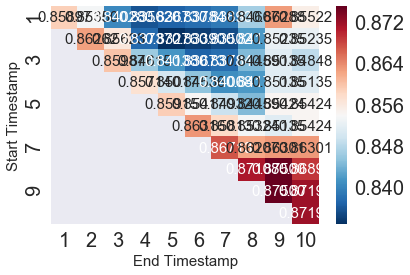

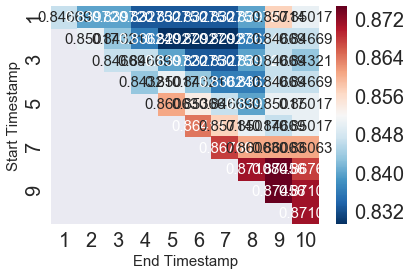

In [5]:
'''
Training model using traffic density
'''
model_based_on_N = train_model.model_based_on_N(n_data, y, visualization=True)

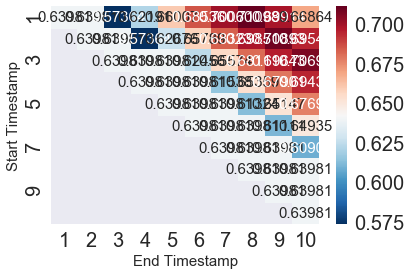

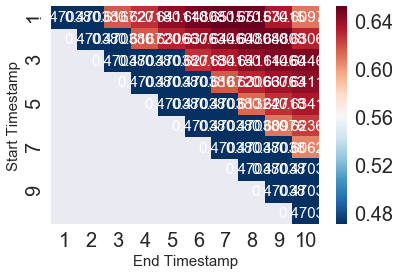

In [6]:
'''
Training model using turning behavior
'''
model_based_on_TN = train_model.model_based_on_TN(tn_data, y, visualization=True)

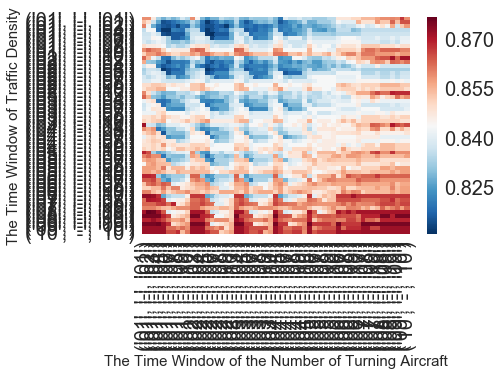

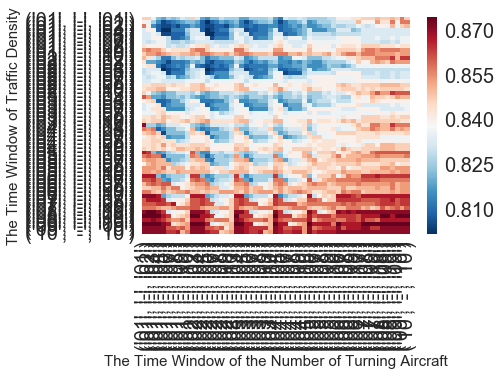

In [7]:
'''
Training model using traffic density and turning behavior
'''
model_based_on_N_and_TN = train_model.model_based_on_N_and_TN(n_data,tn_data,y,visualization=True)